In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')


In [2]:
tracks = pd.read_csv('tracks_records.csv')
tracks.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
tracks.shape

(114000, 21)

In [4]:
tracks.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
tracks.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

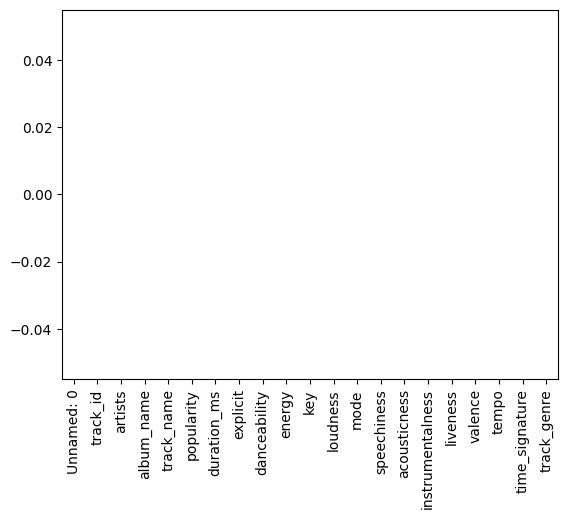

In [6]:
tracks.dropna(inplace = True)
tracks.isnull().sum().plot.bar()
plt.show()


In [7]:
tracks = tracks.drop(['Unnamed: 0', 'track_id', 'album_name','explicit','time_signature'], axis = 1)


In [14]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
tracks['artist_encoded'] = label_encoder.fit_transform(tracks['artists'])

# Exclude non-numeric columns
numeric_columns = tracks.select_dtypes(include=['number']).columns
numeric_data = tracks[numeric_columns]

## K-MEANS CLUSTERING


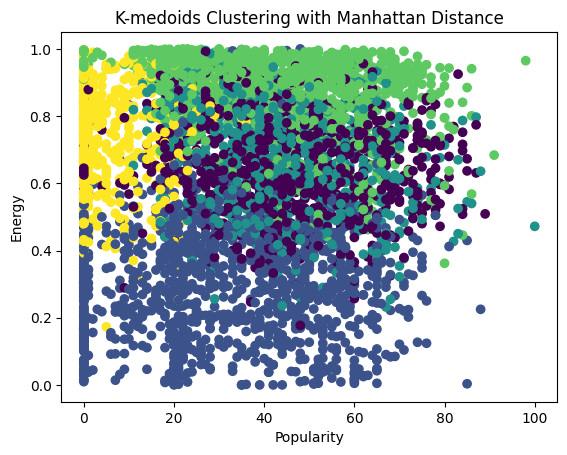

In [15]:
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load a subset of the dataset (you may adjust the subset size as needed)
data = pd.read_csv('tracks_records.csv', nrows=114000)  # Replace 'your_dataset.csv' and adjust nrows as needed

# Selecting relevant features for clustering
features = data[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-medoids clustering with Manhattan distance and 100 maximum iterations
n_clusters = 5
kmedoids = KMedoids(n_clusters=n_clusters, metric='manhattan', max_iter=500)

# Sampling a smaller subset of data for clustering
sample_indices = np.random.choice(scaled_features.shape[0], size=5000, replace=False)
sampled_data = scaled_features[sample_indices]

kmedoids.fit(sampled_data)
sampled_labels = kmedoids.labels_  # Cluster labels for the sampled data

# Assign cluster labels to the subset of the DataFrame used for clustering
data_subset = data.iloc[sample_indices].copy()  # Subset of the original data
data_subset['cluster'] = sampled_labels  # Assign labels to the subset DataFrame

# Visualizing the clusters (example using two dimensions for visualization)
plt.scatter(data_subset['popularity'], data_subset['energy'], c=data_subset['cluster'], cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('K-medoids Clustering with Manhattan Distance')
plt.show()


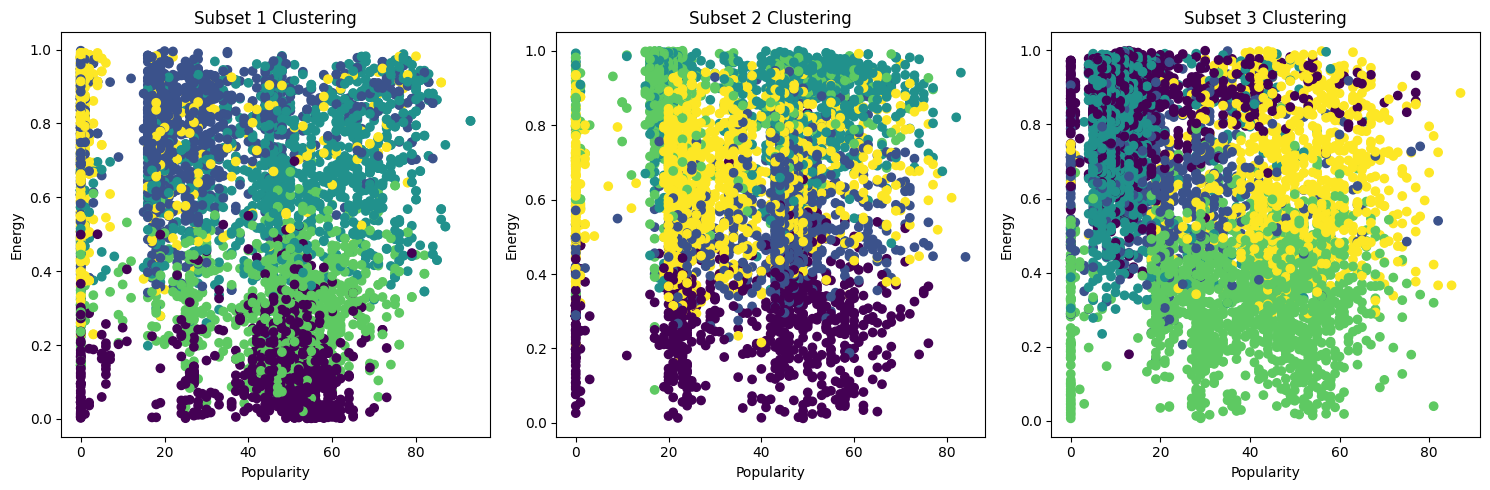

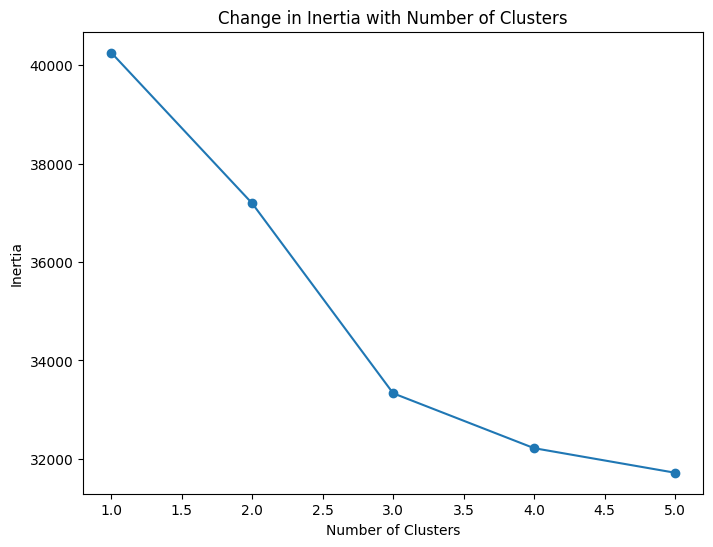

In [16]:
# Function to plot inertia for varying numbers of clusters
def inertia_plot(data, max_clusters=5):
    inertia = []
    for i in range(1, max_clusters + 1):
        kmedoids = KMedoids(n_clusters=i, metric='manhattan', max_iter=100)
        kmedoids.fit(data)
        inertia.append(kmedoids.inertia_)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Change in Inertia with Number of Clusters')
    plt.show()

# Previous code for subsets and clustering
subset1 = data.iloc[:5000]
subset2 = data.iloc[5000:10000]
subset3 = data.iloc[10000:15000]

kmedoids_sub1 = KMedoids(n_clusters=5, metric='manhattan', max_iter=100)
kmedoids_sub1.fit(scaled_features[:5000])
labels_sub1 = kmedoids_sub1.labels_

kmedoids_sub2 = KMedoids(n_clusters=5, metric='manhattan', max_iter=100)
kmedoids_sub2.fit(scaled_features[5000:10000])
labels_sub2 = kmedoids_sub2.labels_

kmedoids_sub3 = KMedoids(n_clusters=5, metric='manhattan', max_iter=100)
kmedoids_sub3.fit(scaled_features[10000:15000])
labels_sub3 = kmedoids_sub3.labels_

# Plotting clusters of different subsets
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(subset1['popularity'], subset1['energy'], c=labels_sub1, cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Subset 1 Clustering')

plt.subplot(1, 3, 2)
plt.scatter(subset2['popularity'], subset2['energy'], c=labels_sub2, cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Subset 2 Clustering')

plt.subplot(1, 3, 3)
plt.scatter(subset3['popularity'], subset3['energy'], c=labels_sub3, cmap='viridis')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.title('Subset 3 Clustering')

plt.tight_layout()
plt.show()

# Usage of inertia_plot function
inertia_plot(sampled_data, max_clusters=5)  # Change max_clusters as needed


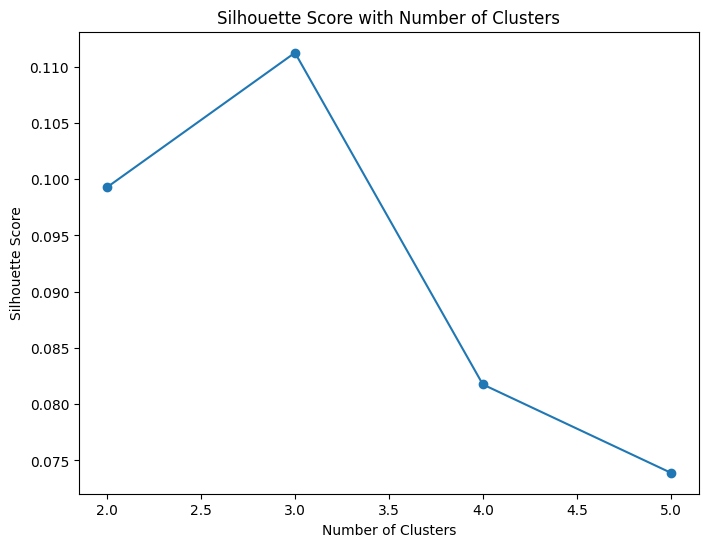

In [17]:
from sklearn.metrics import silhouette_score

def silhouette_plot(data, max_clusters=5):
    silhouette_scores = []
    for i in range(2, max_clusters + 1):  # Silhouette score requires at least 2 clusters
        kmedoids = KMedoids(n_clusters=i, metric='manhattan', max_iter=100)
        kmedoids.fit(data)
        labels = kmedoids.labels_
        silhouette_scores.append(silhouette_score(data, labels))

    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score with Number of Clusters')
    plt.show()

# Previous code for subsets and clustering remains the same

# Usage of silhouette_plot function
silhouette_plot(sampled_data, max_clusters=5)  # Change max_clusters as needed


In [18]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for a specific number of clusters
kmedoids = KMedoids(n_clusters=5, metric='manhattan', max_iter=100)
kmedoids.fit(sampled_data)
labels = kmedoids.labels_

silhouette_avg = silhouette_score(sampled_data, labels)
print(f"Silhouette Score for 5 clusters: {silhouette_avg}")

# Calculate inertia for the same clustering
inertia = kmedoids.inertia_
print(f"Inertia for 5 clusters: {inertia}")


Silhouette Score for 5 clusters: 0.07391344446284293
Inertia for 5 clusters: 31719.267804070012


## T-DISTRIBUTED STOCHASTIC NEIGHBOR EMBEDDING


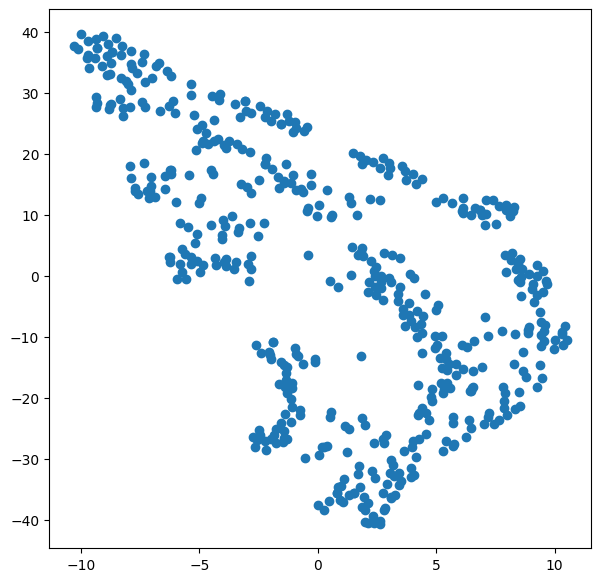

In [20]:
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate pairwise Manhattan distances
def pairwise_manhattan(X):
    return squareform(pdist(X, 'cityblock'))

# Assuming 'artist' is a categorical column
label_encoder = LabelEncoder()
tracks['artist_encoded'] = label_encoder.fit_transform(tracks['artists'])

# Exclude non-numeric columns
numeric_columns = tracks.select_dtypes(include=['number']).columns
numeric_data = tracks[numeric_columns]

# Calculate pairwise Manhattan distances
manhattan_distances = pairwise_manhattan(numeric_data.head(500))

# Apply t-SNE with precomputed Manhattan distances
model = TSNE(metric='precomputed', init='random', random_state=0)  # Removing init='pca'
tsne_data_manhattan = model.fit_transform(manhattan_distances)

# Plot the results
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data_manhattan[:, 0], tsne_data_manhattan[:, 1])
plt.show()


In [21]:
tracks['track_name'].nunique(), tracks.shape


(73608, (113999, 17))

In [22]:
tracks = tracks.sort_values(by=['popularity'], ascending=False)
tracks.drop_duplicates(subset=['track_name'], keep='first', inplace=True)


In [23]:
floats = []
for col in tracks.columns:
    if tracks[col].dtype == 'float':
        floats.append(col)

len(floats)


9

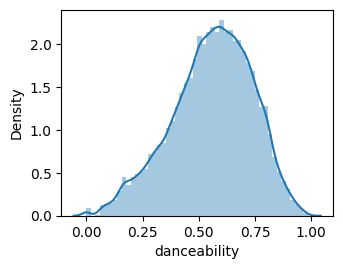

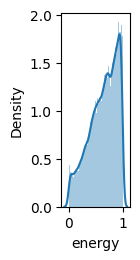

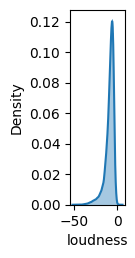

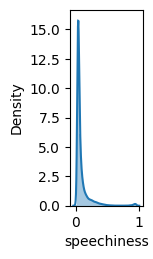

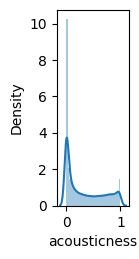

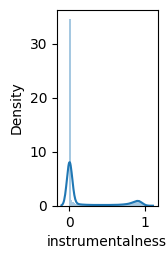

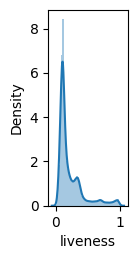

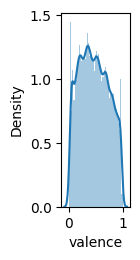

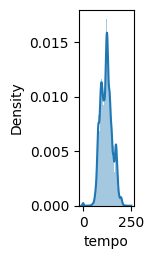

In [24]:
plt.subplots(figsize = (15, 5))
for i, col in enumerate(floats):
    plt.subplot(2, 5, i + 1)
    sb.distplot(tracks[col])
    plt.tight_layout()
    plt.show()


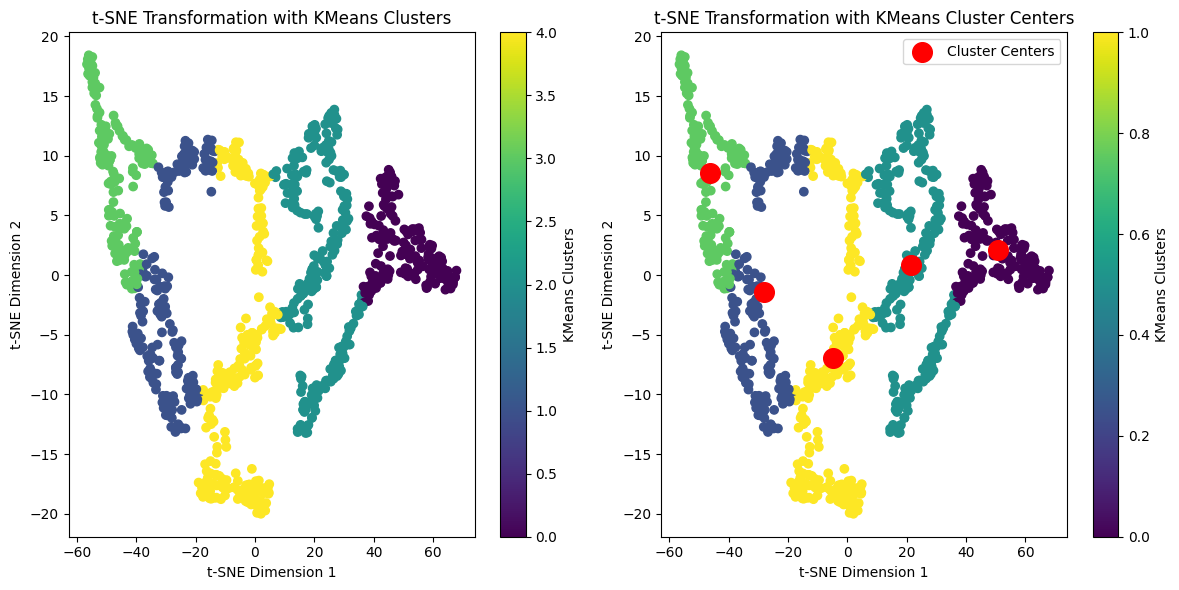

In [19]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'numeric_data' is your numeric dataset

# Limit the number of rows for processing
max_rows = 1000  # Specify the maximum number of rows to process

# Apply t-SNE on the limited numeric data
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(numeric_data.head(max_rows))

# Apply KMeans clustering on the limited t-SNE-transformed data
kmeans = KMeans(n_clusters=5, random_state=0)  # Replace 5 with your desired number of clusters
kmeans_clusters = kmeans.fit_predict(tsne_data)

# Visualize t-SNE transformation
plt.figure(figsize=(12, 6))

# Plot t-SNE scatter plot
plt.subplot(1, 2, 1)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('t-SNE Transformation with KMeans Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='KMeans Clusters')

# Plot KMeans cluster centers on t-SNE plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=kmeans_clusters, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=200, c='red', label='Cluster Centers')
plt.title('t-SNE Transformation with KMeans Cluster Centers')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='KMeans Clusters')
plt.legend()

plt.tight_layout()
plt.show()


In [30]:
%%capture
song_vectorizer = CountVectorizer()
song_vectorizer.fit(tracks['track_genre'])


In [31]:
tracks = tracks.sort_values(by=['popularity'], ascending=False).head(10000)


In [32]:
def get_similarities(song_name, tracks, song_vectorizer):
    # Getting vector for the input song.
    text_array1 = song_vectorizer.transform(tracks[tracks['track_name'] == song_name]['track_genre']).toarray()
    num_array1 = tracks[tracks['track_name'] == song_name].select_dtypes(include=np.number).to_numpy()

    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in tracks.iterrows():
        name = row['track_name']

        # Getting vector for the current song.
        text_array2 = song_vectorizer.transform(tracks[tracks['track_name'] == name]['track_genre']).toarray()
        num_array2 = tracks[tracks['track_name'] == name].select_dtypes(include=np.number).to_numpy()

        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)

    return sim


In [33]:
def recommend_songs(song_name, data=tracks):
    # Base case
    if data[data['track_name'] == song_name].shape[0] == 0:
        print('Some songs you may like:\n')
        for song in data.sample(n=5)['track_name'].values:
            print(song)
        return

    data['similarity_factor'] = get_similarities(song_name, data)

    data.sort_values(by=['similarity_factor', 'popularity'],
                     ascending=[False, False],
                     inplace=True)

    # Display recommended songs excluding the input song itself
    display(data[data['track_name'] != song_name][['track_name', 'artists']].head(5))


In [34]:
recommend_songs("Can't Help Falling In Love	",tracks)


Some songs you may like:

Summer
Savannah
Easy
Our Time Is Now
Paranoia
